# k-NN (k-Nearest Neighbors) 


k-NN (k-Nearest Neighbors) เป็นวิธีการจัดกลุ่มข้อมูล (classification) หรือทำนายค่า (regression) โดยใช้ข้อมูลที่ใกล้เคียงที่สุดกับข้อมูลที่ต้องการทำนาย วิธีการทำงานของ k-NN คือการหาข้อมูลที่ใกล้เคียงกับข้อมูลที่ต้องการทำนายโดยการคำนวณระยะห่างระหว่างข้อมูลที่ต้องการทำนายกับข้อมูลในชุดข้อมูลการฝึกสอน แล้วใช้ค่า k เพื่อเลือกตัดสินใจด้วยโหวตเพื่อกำหนดคลาสหรือค่าที่ถูกที่สุด

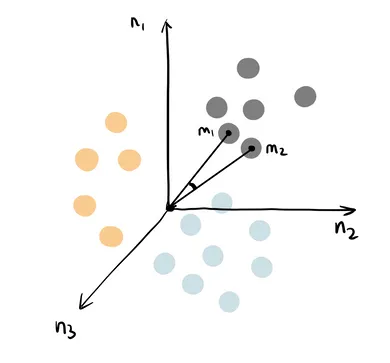
k-NN classification
[ที่มา](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)  

สมการที่สำคัญในวิธี k-Nearest Neighbors (k-NN) คือขั้นตอนการคำนวณระยะห่างระหว่างตัวอย่าง (instances) และการทำนายคลาสของตัวอย่างใหม่โดยอิงตามคลาสของตัวอย่างที่ใกล้ที่สุด

ในอัลกอริทึมนี้ จะต้องเลือกค่า k ที่เป็นบวกและเลขจำนวนเต็มเพื่อระบุจำนวนของตัวอย่างที่ใกล้เคียงที่จะใช้ในการจำแนกคลาสของตัวอย่างใหม่ ซึ่งค่า k จะต้องเลือกให้เหมาะสมกับข้อมูลและปัญหาที่ต้องการแก้ไข 
โดยที่ ใน k-NN, เราใช้ระยะห่าง Euclidean distance, Manhattan distance, หรือ Minkowski distance เป็นต้น ในการวัดความคล้ายคลึงระหว่างตัวอย่าง 

สมการของ Euclidean distance สำหรับตัวอย่างที่มีคุณสมบัติ (features) $x_i$ และ $x_j$ สามารถเขียนได้ดังนี้:

\begin{align}
\text{distance}(x_i, x_j) = \sqrt{\sum_{k=1}^{n}(x_{i,k} - x_{j,k})^2}
\end{align}

ในสมการนี้:
- $x_i$ และ $x_j$ คือตัวอย่างสองตัวที่ต้องการหาระยะห่าง
- $n$ คือจำนวนของคุณสมบัติ (features) ของตัวอย่าง
- $x_{i,k}$ และ $x_{j,k}$ คือค่าของคุณสมบัติที่ $k$ ของตัวอย่าง $x_i$ และ $x_j$ ตามลำดับ

หา k ตัวอย่างที่ใกล้ที่สุด: นับจำนวนตัวอย่างใกล้เคียงที่สุด k ตัวอย่างตามระยะทางที่คำนวณได้ ซึ่งสามารถเลือกตัวอย่างเหล่านี้จากชุดข้อมูลที่ใช้ในการฝึกโมเดล

ทำการเลือกคลาส: จากตัวอย่างใกล้เคียง k ตัวอย่างที่ได้มา นับจำนวนคลาสของตัวอย่างเหล่านี้และเลือกคลาสที่มีจำนวนมากที่สุดเป็นคลาสของตัวอย่างใหม่


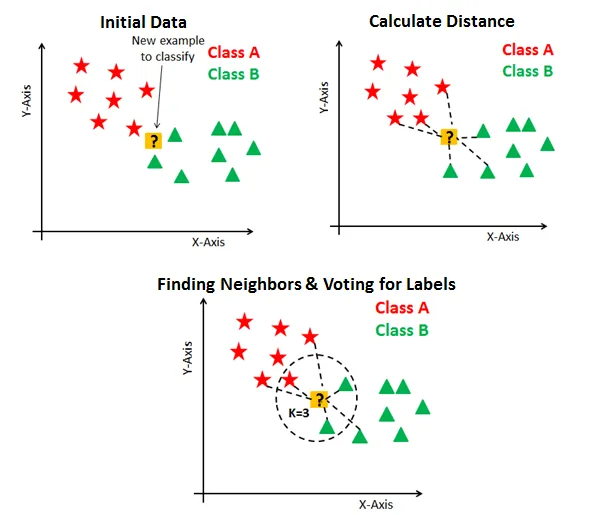
k-NN algorithm [ที่มา](https://blakelobato1.medium.com/k-nearest-neighbor-classifier-implement-homemade-class-compare-with-sklearn-import-6896f49b89e)

*Hyperparameter tuning *

เป็นกระบวนการปรับค่าพารามิเตอร์หรือตัวแปรสำหรับการเรียนรู้ของแบบจำลองเพื่อให้แบบจำลองทำงานดีที่สุด ในกรณีของ k-NN ตัวแปรที่ต้องปรับคือค่า k ซึ่งเป็นจำนวนข้อมูลใกล้เคียงที่ใช้ในการตัดสินใจ การปรับค่า hyperparameter จะช่วยปรับแต่งแบบจำลองให้มีประสิทธิภาพมากที่สุดตามเงื่อนไขและปัญหาที่กำหนด  เพื่อปรับค่า hyperparameter ใน k-NN หรือแบบจำลองอื่น ๆ นักวิจัยและผู้ประยุกต์ใช้เทคนิคต่าง ๆ เช่น Grid Search, Random Search, หรือ Bayesian Optimization เพื่อทดลองค่าที่แตกต่างกันและเลือกค่าที่ดีที่สุดสำหรับแบบจำลอง

# ตัวอย่างการสร้าง machine learning model ด้วย k-NN algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
RANDOM_SEED = 2566

# Generate simulated dataset
Generate simulated 2-class data for binary classification with 2 features

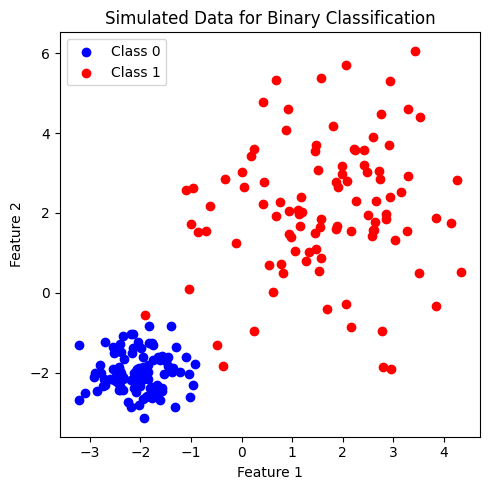

In [3]:
def generate_multi_class_dataset(n_classes, mean_class, std_class,n_samples):
    # สร้างชุดข้อมูลแบบ multi-class
    # ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
    np.random.seed(RANDOM_SEED)

    # กำหนด จำนวน features
    n_features = 2
    
    #  สร้างข้อมูล x สำหรับแต่ละคลาส
    x_data = []
    for label in range(n_classes):
        _ = np.random.normal(mean_class[label], std_class[label], (n_samples, n_features))
        x_data.append(_)

    # สร้างข้อมูล y หรือ labels สำหรับแต่ละคลาส
    y_data = []
    y_data.append(np.zeros(n_samples))
    for label in range(1, n_classes):
        y_data.append(label*np.ones(n_samples))

    # รวมข้อมูล x และ y จากทุกคลาส
    x = np.vstack((x_data))
    y = np.hstack(y_data)

    return x, y

# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 2

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,-2], [2,2]]
std_class  = [[0.5,0.5], [1.5,1.5]] 

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 100

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่มีอยู่
plt.figure(figsize = (5,5))
plt.scatter(x[y==0, 0], x[y==0, 1], c='b', label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], c='r', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Data for Binary Classification')
plt.legend()
plt.tight_layout()
plt.show()

# KNN

## KNN Classification with different weights

Figure below show plot the decision surface for two KNN classifiers with different weight options.



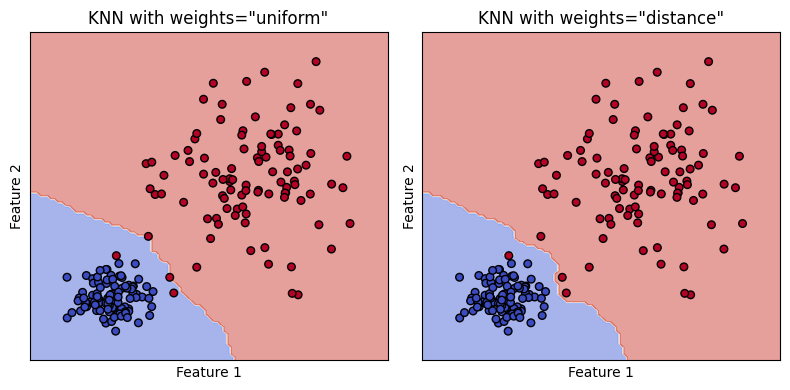

In [4]:
# สร้างชุดโมเดล
models = (KNC(weights='uniform'),
          KNC(weights='distance')
          )

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = (clf.fit(x, y) for clf in models)

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['KNN with weights="uniform"',
          'KNN with weights="distance"'
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,2, figsize=(8, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

## KNC with varying 'n_neighbors'

Key Idea: The optimal choice of the value 
 is highly data-dependent: in general a larger 
 suppresses the effects of noise, but makes the classification boundaries less distinct.



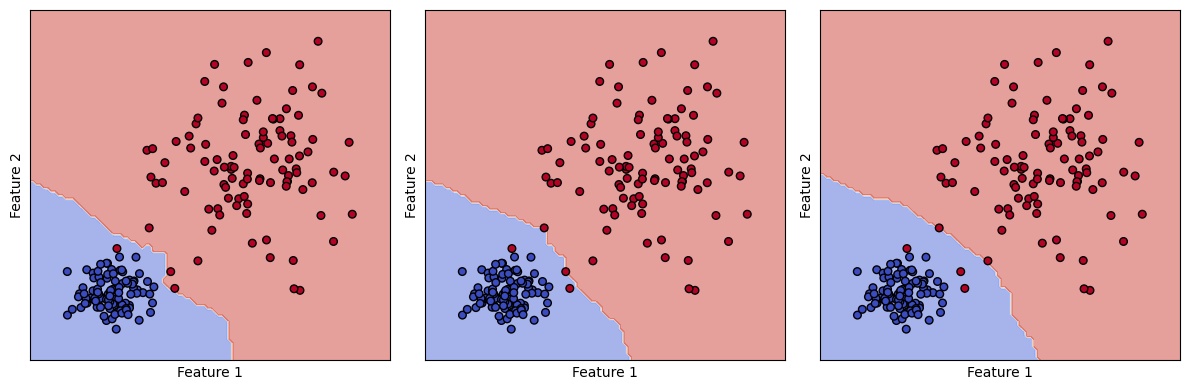

In [5]:
# สร้างชุดโมเดล
weight = 'uniform'
models = (KNC(weights=weight, n_neighbors=3),
          KNC(weights=weight, n_neighbors=5),
          KNC(weights=weight, n_neighbors=10),
          )

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = (clf.fit(x, y) for clf in models)

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['KNC:weights="uniform", n_neighbors=3',
          'KNC: weights="uniform", n_neighbors=5',
          'KNC: weights="uniform", n_neighbors=10'
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,3, figsize=(4*3, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    #ax.set_title(title)
plt.tight_layout()
plt.show()

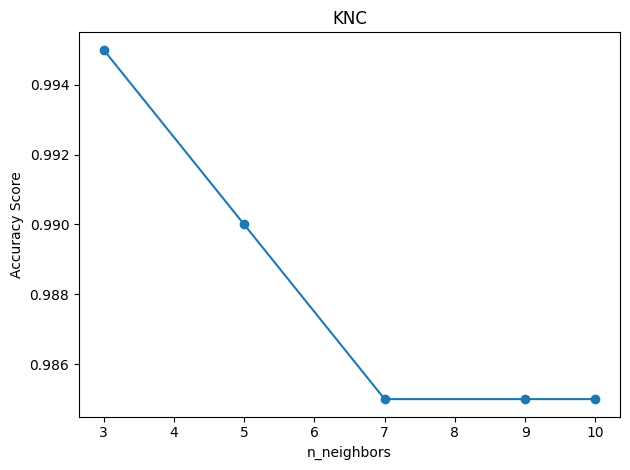

In [6]:
# กำหนดช่วงค่า C 
n_neighbors = [3,5,7,9,10]

# สร้างโมเดลด้วค่า C ต่างๆ ให้โมเดลเรียนรู้จากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้ แล้วทดสอบโมเดลด้วย accuracy score
accuracy = []
for n in n_neighbors:
    clf = KNC(n_neighbors=n, weights='uniform')
    clf.fit(x, y)

    # ทำนายค่า y โดยใช้โมเดล
    prediction = clf.predict(x)
    
    # คำนวณ accuracy score
    accuracy.append(accuracy_score(y, prediction))

# แสดงผล
plt.plot(n_neighbors, accuracy, marker='o')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNC')
plt.tight_layout()
plt.show()

## KNN Classification pipeline

### Generate 3-class dataset

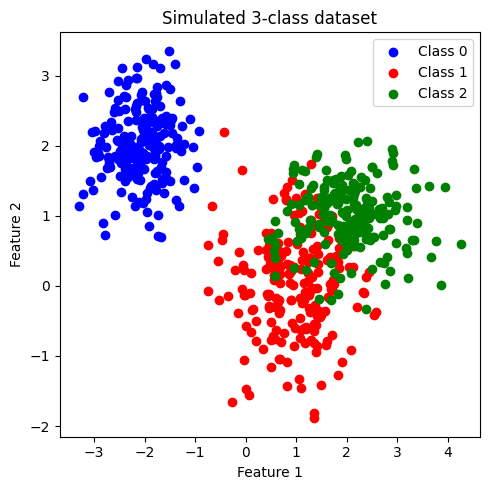

In [7]:
# สร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 3

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,2], [1,0], [2,1]]
std_class  = [[0.5,0.5], [0.75,0.75],[0.75,0.5]] 

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 200

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่สร้างขึ้น
plt.figure(figsize = (5,5))
color_list = ['b','r','g']
for label in range(n_classes):
    plt.scatter(x[y==label, 0], x[y==label, 1], c=color_list[label], label='Class '+str(label))
    
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated 3-class dataset')
plt.legend()
plt.tight_layout()
plt.show()


### แบ่งข้อมูลเป็น train-test และ cross-validation
โดยไม่กำกับการแบ่งตามสัดส่วนคลาสของคำตอบ (stratification)

In [8]:
# สร้าง training data และ test data โดยแบ่งจากชุดข้อมูล x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    stratify=None, 
                                                    shuffle=True,
                                                    random_state=RANDOM_SEED)

print('Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[  0. 169.]
 [  1. 155.]
 [  2. 156.]]
Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[ 0. 31.]
 [ 1. 45.]
 [ 2. 44.]]


In [9]:
# แบ่งข้อมูล training data ด้วย 5-fold cross-validation เพื่อ tune hyperparameter
#cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

cv_splitter = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

### ทำการ standardize ข้อมูลทั้งหมด
ใช้ mean และ SD จาก training set ในการ standardize test set เพื่อป้องกัน information leak

In [10]:
x_scaler = StandardScaler().fit(x_train)

x_train = x_scaler.transform(x_train)
x_test  = x_scaler.transform(x_test)

### เทรนโมเดล ด้วย base model (default hyperparameter)

Training Set: Classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       169
         1.0       0.89      0.87      0.88       155
         2.0       0.89      0.89      0.89       156

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       0.81      0.87      0.84        45
         2.0       0.85      0.80      0.82        44

    accuracy                           0.88       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.88      0.88      0.87       120



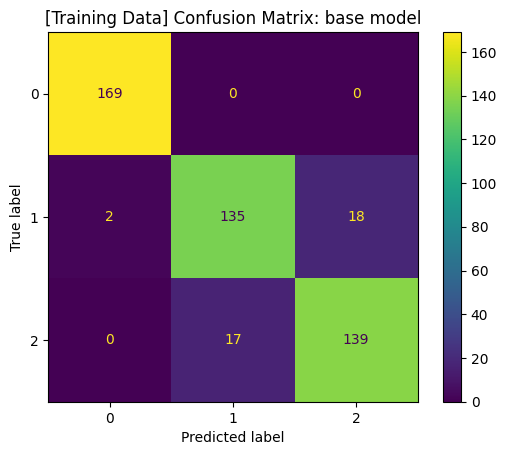

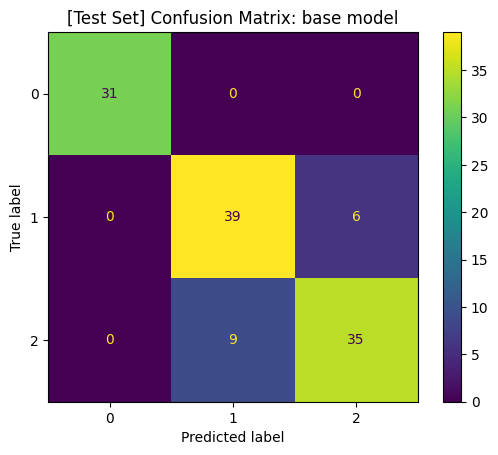

In [11]:
# สร้างโมเดล
base_clf = KNC()

# สอนโมเดลด้วย training data
base_clf.fit(x_train,y_train)

# ให้โมเดลทำนาย training data
y_pred = base_clf.predict(x_train)

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของ training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('[Training Data] Confusion Matrix: base model')

# ให้โมเดลทำนาย test data
y_pred = base_clf.predict(x_test)

# แสดงผล classification ของโมเดล
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))

# คำนวนและแสดงผล confusion matrix ของ test set
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('[Test Set] Confusion Matrix: base model')

plt.show()

### Hyperparameter tuning, then เทรนโมเดล ด้วย tuned model

We will tune 2 key hyperparameters:
1. 'kernel' .. as seen from previous demonstration.
2. 'C' 



Training Set: Classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       169
         1.0       0.89      0.87      0.88       155
         2.0       0.89      0.89      0.89       156

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       0.81      0.87      0.84        45
         2.0       0.85      0.80      0.82        44

    accuracy                           0.88       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.88      0.88      0.87       120



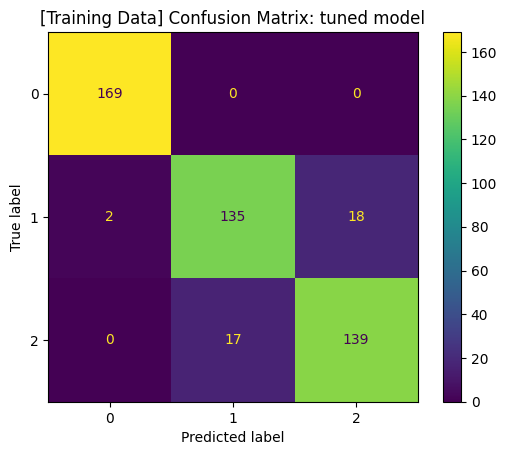

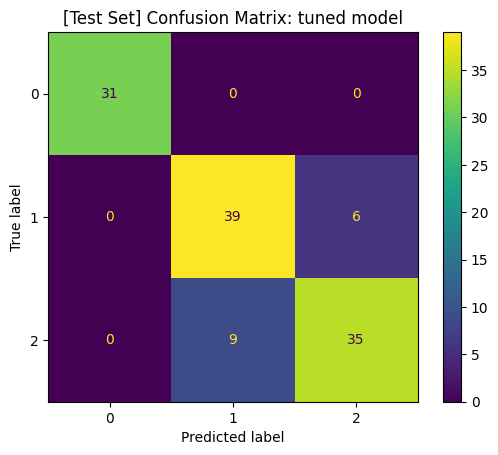

In [12]:
# กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
clf_params = {'weights': ['uniform','distance'],
              'n_neighbors': [3, 5, 7, 9, 11]
              }

# ใช้ GridSearchCV เพื่อสอนโมเดลจากชุดค่า hyperparameters จาก clf_params 
# และคำนวณค่า accuracy ของแต่ละโมเดล เพื่อเลือกชุด hyperparameters ที่ดีที่สุด
# โดยใช้เทคนิค cross-validation ในการแบ่งกลุ่ม validation data จาก training data
tuned_clf = GridSearchCV(estimator=base_clf, param_grid=clf_params, 
                             scoring=['accuracy'], refit='accuracy', cv=cv_splitter)

# สอนโมเดลด้วย training data
base_clf.fit(x_train,y_train)

# ให้โมเดลทำนาย training data
y_pred = base_clf.predict(x_train)

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของ training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('[Training Data] Confusion Matrix: tuned model')

# ให้โมเดลทำนาย test data
y_pred = base_clf.predict(x_test)

# แสดงผล classification ของโมเดล
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))

# คำนวนและแสดงผล confusion matrix ของ test set
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('[Test Set] Confusion Matrix: tuned model')

plt.show()

Discuss: Improve accuracy?